In [1]:
#SCRIPT PURPOSE: Turn LSV for Fuel Cells into a Crossover Value
#Author: Shan Kutagulla
#Inputs: Area of MEA

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

In [3]:
def determine_crossover_fit(df, active_area,xlabel,ylabel,start_percentage,end_percentage):
    #Method: remove first X%, last Y%, linear fit, y-intercept is nominal crossover
    
    #check datatype of array to be DataFrame
    if isinstance(df, pd.DataFrame):
        start_pt=int(start_percentage*len(df)) #establish start point
        end_pt=int(end_percentage*len(df)) #establish end point
        df=df.iloc[start_pt:end_pt] #chop up data to get linear part of graph
        coeff=np.polyfit(df[xlabel],df[ylabel],deg=1) #polynomial fit degree 1 (line)
        plt.plot(df[xlabel],df[ylabel]) #plot data portion selected
        plt.plot(df[xlabel],(coeff[1]+coeff[0]*df[xlabel]))
        return coeff[1],coeff[1]/active_area, 1/coeff[0]
    else:
        print("ERROR: Not a DataFrame Object")
        return null

In [4]:
def determine_crossover_peak(df, active_area,xlabel,ylabel,end_percentage):
    #Method: retrieve first x% of data and take highest value
    
    #check datatype of array to be DataFrame
    if isinstance(df, pd.DataFrame):
        end_pt=int(end_percentage*len(df)) #establish end point
        df=df.iloc[::end_pt] #chop up data to get top part
        return max(df[ylabel]),max(df[ylabel])/active_area
    else:
        print("ERROR: Not a DataFrame Object")
        return null

In [5]:
AREA=25 #area of MEA in cm2
filename="/Users/shanmukhkutagulla/My Drive/Fuel Cell Docs/Bare Nafion Control 02112022/Nafion Bare 02112022/2_Nafion Bare 02112022-Potential Linear Sweep 20220211 184815.csv"

In [6]:
data=pd.read_csv(filename, usecols=["Working Electrode vs. NHE (V)","Current (mA)"],encoding='cp1252')

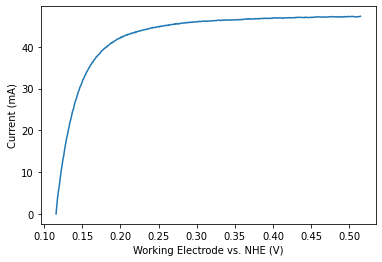

In [7]:
#plot data without normalizing for area
plt.plot(data["Working Electrode vs. NHE (V)"],data["Current (mA)"])
plt.xlabel("Working Electrode vs. NHE (V)");
plt.ylabel("Current (mA)");

Text(0, 0.5, 'Current Density (mA/cm2)')

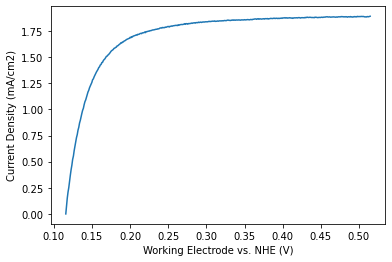

In [8]:
#plot with normalization wrt area
plt.plot(data["Working Electrode vs. NHE (V)"],data["Current (mA)"]/AREA)
plt.xlabel("Working Electrode vs. NHE (V)")
plt.ylabel("Current Density (mA/cm2)")

**Note: Choose the crossover value that is more conservative in general**

Crossover for Tested MEA:43.982617659319274 mA
Crossover for Tested MEA per unit area:1.759304706372771 mA/cm2

Crossover (low peak) for Tested MEA:47.2914 mA
Crossover (low peak) for Tested MEA per unit area:1.8916560000000002 mA/cm2

Short Resistance (Ohms):140.19316253253305 Ohms


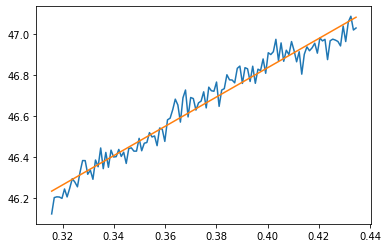

In [10]:
#determine crossover via two methods (fit is better for no major soft short, else use the seond)
crossover_mea=determine_crossover_fit(data,AREA,"Working Electrode vs. NHE (V)","Current (mA)",0.50,0.80)
crossover_low_peak=determine_crossover_peak(data,AREA,"Working Electrode vs. NHE (V)","Current (mA)",0.25)
print("**Note: Choose the crossover value that is more conservative in general**")
print()
print("Crossover for Tested MEA:" + str(crossover_mea[0]) + " mA")
print("Crossover for Tested MEA per unit area:" + str(crossover_mea[1]) + " mA/cm2")
print()

print("Crossover (low peak) for Tested MEA:" + str(crossover_low_peak[0]) + " mA")
print("Crossover (low peak) for Tested MEA per unit area:" + str(crossover_low_peak[1]) + " mA/cm2")
print()
print("Short Resistance (Ohms):" +str(crossover_mea[2]*1000)+ " Ohms")